In [1]:
!pip install pyspark

# Initialize Spark Session

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("HCHO Data Analysis") \
    .getOrCreate()
    
spark


# Load the Data

In [4]:
col_mat_nuw_df = spark.read.csv('Dataset/col_mat_nuw_output.csv', header=None, inferSchema=True)
col_mat_nuw_df.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [5]:
col_mat_nuw_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [6]:
mon_kur_jaf_df = spark.read.csv('Dataset/mon_kur_jaf_output.csv', header=None, inferSchema=True)
mon_kur_jaf_df.show()

+--------------------+------------------+----------+----------+
|                 _c0|               _c1|       _c2|       _c3|
+--------------------+------------------+----------+----------+
|                NULL|Bibile, Monaragala|2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala

In [7]:
mon_kur_jaf_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [8]:
kan_df = spark.read.csv('Dataset/kan_output.csv', header=None, inferSchema=True)
kan_df.show()

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|2019-01-12|2019-01-13|
|                NULL|Kandy Proper|2019-01-13|2019-01-14|
|                NULL|Kandy Proper|2019-01-14|2019-01-15|
| 9.6363963467

In [9]:
kan_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



## Changing Header Names

In [10]:
column_names = ['HCHO', 'Location', 'Current date', 'Next date']

In [11]:
for i, new_name in enumerate(column_names):
    col_mat_nuw_df = col_mat_nuw_df.withColumnRenamed(col_mat_nuw_df.columns[i], new_name)

col_mat_nuw_df.show()

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [12]:
for i, new_name in enumerate(column_names):
    mon_kur_jaf_df = mon_kur_jaf_df.withColumnRenamed(mon_kur_jaf_df.columns[i], new_name)

mon_kur_jaf_df.show()

+--------------------+------------------+------------+----------+
|                HCHO|          Location|Current date| Next date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [13]:
for i, new_name in enumerate(column_names):
    kan_df = kan_df.withColumnRenamed(kan_df.columns[i], new_name)

kan_df.show()

+--------------------+------------+------------+----------+
|                HCHO|    Location|Current date| Next date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  201

## Merge Datasets

In [14]:
combined_df = col_mat_nuw_df.union(mon_kur_jaf_df).union(kan_df)


In [15]:
combined_df.printSchema()

root
 |-- HCHO: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current date: date (nullable = true)
 |-- Next date: date (nullable = true)



In [16]:
num_rows = combined_df.count()
num_cols = len(combined_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 12782
Number of columns: 4


In [17]:
combined_df.describe().show()

+-------+--------------------+-------------------+
|summary|                HCHO|           Location|
+-------+--------------------+-------------------+
|  count|                7918|              12782|
|   mean|1.192778916513748...|               NULL|
| stddev|9.322341209771851E-5|               NULL|
|    min|-3.52473024357239...| Bibile, Monaragala|
|    max|8.997101837438971E-4|Nuwara Eliya Proper|
+-------+--------------------+-------------------+



In [18]:
combined_df.show()

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [19]:
pandas_df = combined_df.toPandas()

output = 'Dataset/combined_df.csv'

pandas_df.to_csv(output, index=False)

print(f"Pandas dataframe saved to {output}")

Pandas dataframe saved to Dataset/combined_df.csv


# Cleaning the data

## Duplicates

In [20]:
total_rows = combined_df.count()
distinct_rows = combined_df.distinct().count()

print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")
if total_rows > distinct_rows:
    print("There are duplicates in the DataFrame.")
else:
    print("No duplicates found.")


Total rows: 12782
Distinct rows: 12782
No duplicates found.


## Null values

In [21]:
from pyspark.sql.functions import col, count, when, isnull

null_counts = combined_df.select([count(when(isnull(c), c)).alias(c) for c in combined_df.columns])
null_counts.show()


+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|4864|       0|           0|        0|
+----+--------+------------+---------+



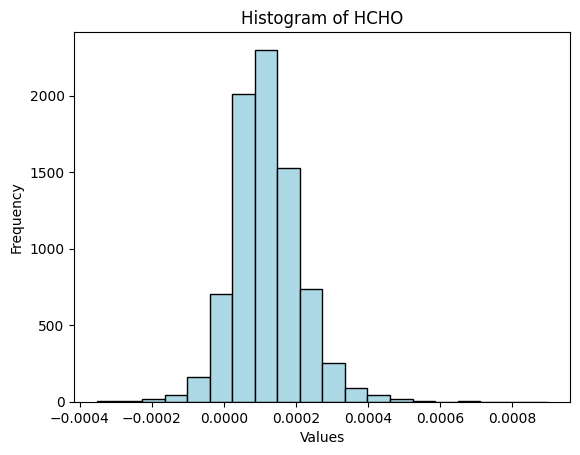

In [22]:
import matplotlib.pyplot as plt

pandas_df = combined_df.toPandas()

plt.hist(pandas_df['HCHO'], bins=20, color='lightblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')


plt.show()


In [23]:
from pyspark.sql import Window
from pyspark.sql.functions import col, lag, coalesce, lead

null_hcho_counts = combined_df.filter(col("HCHO").isNull()).count()

# continue until there are no nulls left
while null_hcho_counts > 0:
    # window specs
    backward_windowSpec = Window.orderBy("Current Date")
    forward_windowSpec = Window.orderBy("Current Date")
    
    #using lag to carry last observation forward
    previous_value = lag("HCHO", 1).over(backward_windowSpec)
    combined_df = combined_df.withColumn("HCHO", coalesce("HCHO", previous_value))
    
    # using lead to carry next observation backward
    next_value = lead("HCHO", 1).over(forward_windowSpec)
    combined_df = combined_df.withColumn("HCHO", coalesce("HCHO", next_value))
    
    #updating null counts
    null_hcho_counts = combined_df.filter(col("HCHO").isNull()).count()
    

In [24]:
# Calculate missing values for each column
null_counts = combined_df.select([count(when(isnull(c), c)).alias(c) for c in combined_df.columns])

# Show missing counts
null_counts.show()

+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|   0|       0|           0|        0|
+----+--------+------------+---------+



In [25]:
combined_df.show()

+--------------------+-------------------+------------+----------+
|                HCHO|           Location|Current date| Next date|
+--------------------+-------------------+------------+----------+
|1.969834395781014...|     Colombo Proper|  2019-01-01|2019-01-02|
|1.969834395781014...|   Deniyaya, Matara|  2019-01-01|2019-01-02|
|1.969834395781014...|Nuwara Eliya Proper|  2019-01-01|2019-01-02|
|8.829725542537962E-5| Bibile, Monaragala|  2019-01-01|2019-01-02|
|8.829725542537962E-5|  Kurunegala Proper|  2019-01-01|2019-01-02|
|5.830909719406619E-5|      Jaffna Proper|  2019-01-01|2019-01-02|
|1.760713459877335...|       Kandy Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|     Colombo Proper|  2019-01-02|2019-01-03|
|5.803530712000793E-6|   Deniyaya, Matara|  2019-01-02|2019-01-03|
|5.803530712000793E-6|Nuwara Eliya Proper|  2019-01-02|2019-01-03|
|1.919914652467399E-5| Bibile, Monaragala|  2019-01-02|2019-01-03|
|1.370787402778218...|  Kurunegala Proper|  2019-01-02|2019-01

In [26]:
pandas_df = combined_df.toPandas()

pandas_df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000197,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000088,"Bibile, Monaragala",2019-01-01,2019-01-02
4,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01


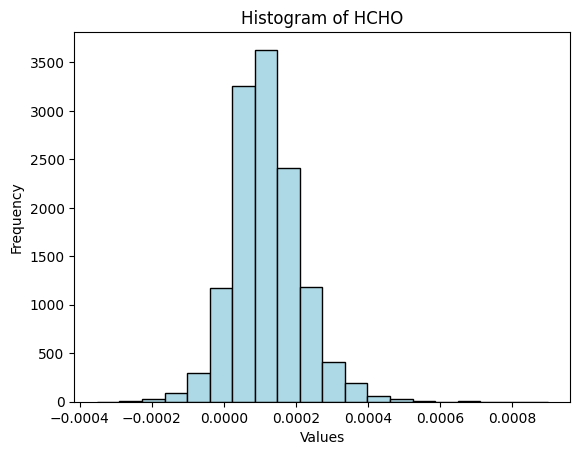

In [27]:
pandas_df = combined_df.toPandas()

plt.hist(pandas_df['HCHO'], bins=20, color='lightblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')

plt.show()

In [28]:
pandas_df = combined_df.toPandas()

output = 'Dataset/combined_df.csv'

pandas_df.to_csv(output, index=False)

print(f"Pandas dataframe saved to {output}")

Pandas dataframe saved to Dataset/combined_df.csv


## Outliers

In [29]:
import seaborn as sns
from pyspark.sql.functions import percentile_approx

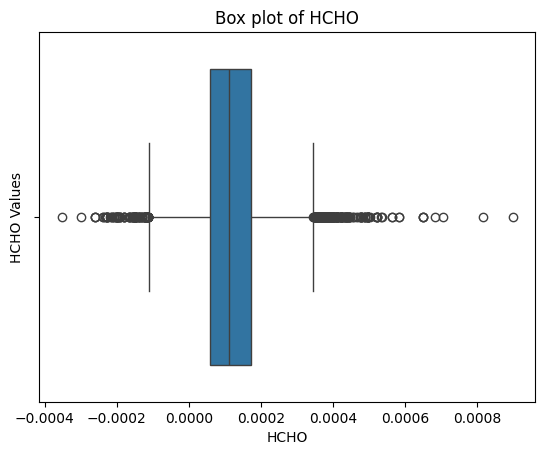

In [30]:
sns.boxplot(x=pandas_df['HCHO'])
plt.ylabel('HCHO Values')
plt.title('Box plot of HCHO')

plt.show()

In [31]:
# calculate Q1, Q3 and IQR
Q1 = pandas_df['HCHO'].quantile(0.25)
Q3 = pandas_df['HCHO'].quantile(0.75)

IQR = Q3 - Q1

# define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound:{lower_bound}")
print(f"Upper bound:{upper_bound}")

# identify outliers
outliers = ((pandas_df['HCHO'] < lower_bound) | (pandas_df['HCHO'] > upper_bound)).sum()

# frequency of outliers
print('Frequency of outliers: ', outliers)

Lower bound:-0.00011171971246543667
Upper bound:0.0003442915300185279
Frequency of outliers:  368


In [32]:
import numpy as np

pandas_df['HCHO'] = np.where(pandas_df['HCHO'] < lower_bound, lower_bound, pandas_df['HCHO'])
pandas_df['HCHO'] = np.where(pandas_df['HCHO'] > upper_bound, upper_bound, pandas_df['HCHO'])


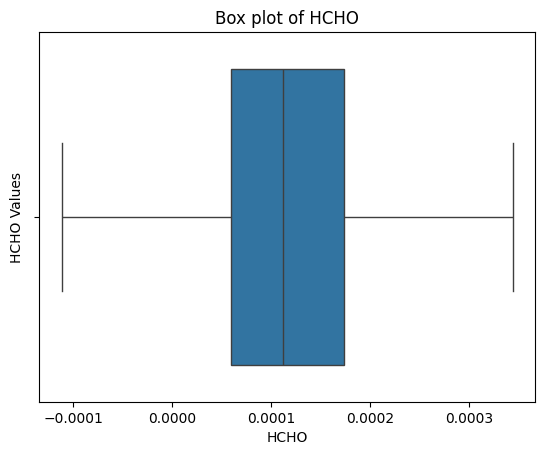

In [33]:
sns.boxplot(x=pandas_df['HCHO'])
plt.ylabel('HCHO Values')
plt.title('Box plot of HCHO')

plt.show()

In [34]:
output = 'Dataset/combined_df.csv'

pandas_df.to_csv(output, index=False)

print(f"Pandas dataframe saved to {output}")

Pandas dataframe saved to Dataset/combined_df.csv


In [35]:
pandas_df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000197,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000088,"Bibile, Monaragala",2019-01-01,2019-01-02
4,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01


## Unique values

In [36]:
for unique_value in sorted(pandas_df['HCHO'].unique()):
    print(unique_value)

-0.00011171971246543667
-0.00011144537923319484
-0.00011118533675158819
-0.00011102503012718791
-0.00010953149395993691
-0.0001089299252098114
-0.00010849980753846467
-0.0001058364625725593
-0.00010505652825361387
-0.00010421431136271193
-0.00010327669205191356
-0.00010282670700689779
-0.00010153305191015103
-0.00010142346317757635
-0.00010048508423133871
-9.997653983236062e-05
-9.961287959137393e-05
-9.896915283582645e-05
-9.875609976006672e-05
-9.762795257692533e-05
-9.75290000242051e-05
-9.744629293521989e-05
-9.728603617986664e-05
-9.723458801103359e-05
-9.656306209314945e-05
-9.640269790807805e-05
-9.629187053943473e-05
-9.605551212045568e-05
-9.530893663843814e-05
-9.298285259082747e-05
-9.03955878775148e-05
-8.969503664672427e-05
-8.888445964777543e-05
-8.871085539815838e-05
-8.7612250354141e-05
-8.613132454580255e-05
-8.562912389164453e-05
-8.45016286786133e-05
-8.4192331214536e-05
-8.416679327042497e-05
-8.405673784804399e-05
-8.375765006525143e-05
-8.336398007201524e-05
-8.24

In [37]:
for unique_value in sorted(pandas_df['Location'].unique()):
    print(unique_value)

Bibile, Monaragala
Colombo Proper
Deniyaya, Matara
Jaffna Proper
Kandy Proper
Kurunegala Proper
Nuwara Eliya Proper


In [38]:
for unique_value in sorted(pandas_df['Current date'].unique()):
    print(unique_value)

2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01

In [39]:
import pandas as pd

current_Date = pandas_df['Current date']

for date in sorted(current_Date.unique()):
    try:
        pd.to_datetime(date)
    except ValueError:
        print(f"Invalid date format: {date}")

In [40]:
for unique_value in sorted(pandas_df['Next date'].unique()):
    print(unique_value)

2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01
2019-04-02

In [41]:
import pandas as pd

next_Date = pandas_df['Next date']

for date in sorted(next_Date.unique()):
    try:
        pd.to_datetime(date)
    except ValueError:
        print(f"Invalid date format: {date}")

In [42]:
pandas_df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000197,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000088,"Bibile, Monaragala",2019-01-01,2019-01-02
4,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01


In [43]:
output = 'Dataset/combined_df.csv'

pandas_df.to_csv(output, index=False)

print(f"Pandas dataframe saved to {output}")

Pandas dataframe saved to Dataset/combined_df.csv


# Plotting the data

In [44]:
# seasonal variations
pandas_df['Current date'] = pd.to_datetime(pandas_df['Current date'])
pandas_df['Next date'] = pd.to_datetime(pandas_df['Next date'])

pandas_df['Year'] = pandas_df['Current date'].dt.year
pandas_df['Month'] = pandas_df['Current date'].dt.month


In [45]:
# Grouping data by year and month for seasonal analysis
monthly_mean_hcho = pandas_df.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

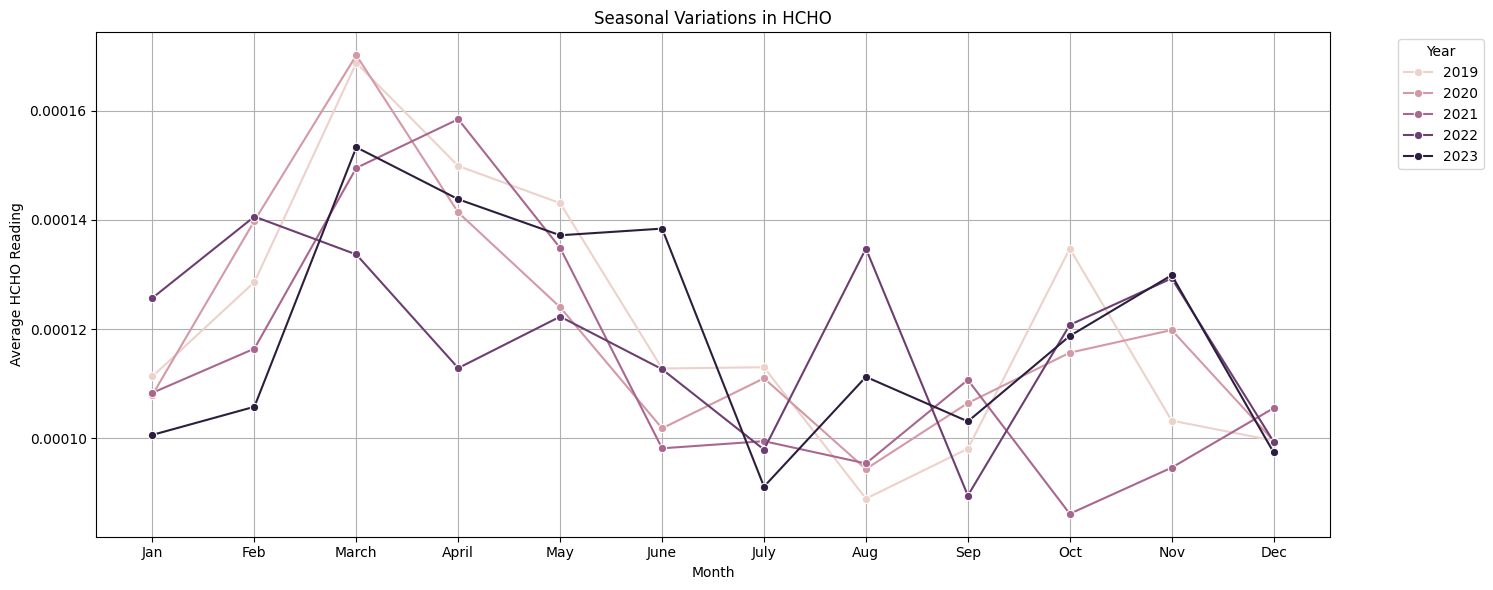

In [46]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
sns.lineplot(x="Month", y="HCHO", hue="Year", data=monthly_mean_hcho, marker='o')
plt.title('Seasonal Variations in HCHO')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

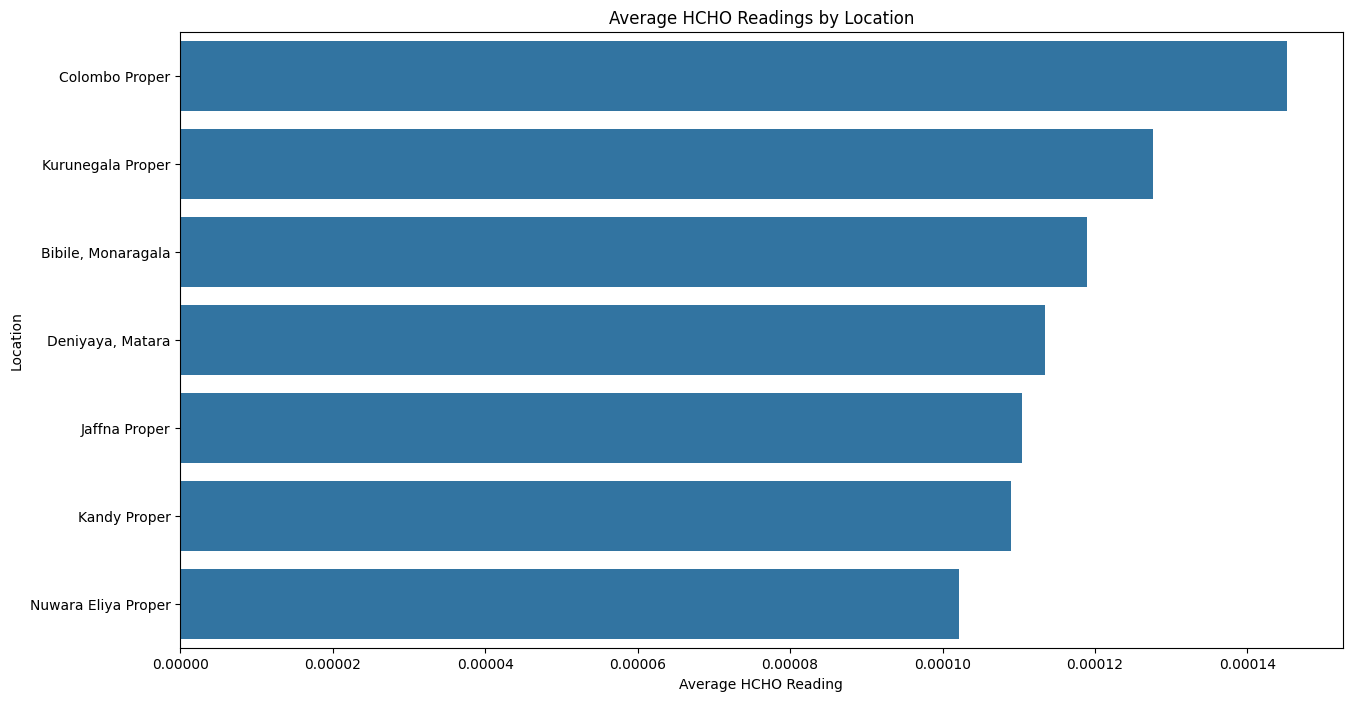

In [47]:
# Grouping the data by location and aggregating HCHO readings
city_data = pandas_df.groupby('Location')['HCHO'].mean().sort_values(ascending=False).reset_index()

# Plotting the HCHO levels for different cities
plt.figure(figsize=(15, 8))
sns.barplot(x='HCHO', y='Location', data=city_data)
plt.title('Average HCHO Readings by Location')
plt.xlabel('Average HCHO Reading')
plt.ylabel('Location')
plt.show()

In [48]:
pandas_df

,HCHO,Location,Current date,Next date,Year,Month
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019,1
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02,2019,1
2,0.000197,Nuwara Eliya Proper,2019-01-01,2019-01-02,2019,1
3,0.000088,"Bibile, Monaragala",2019-01-01,2019-01-02,2019,1
4,0.000088,Kurunegala Proper,2019-01-01,2019-01-02,2019,1
...,...,...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01,2023,12
12778,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01,2023,12
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,2023,12
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01,2023,12
